In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.9 MB/s eta 0:00:00


In [ ]:
pip install transformers torch

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**CODE AFTER INSTALLATION OF ALL LIBRARIES**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

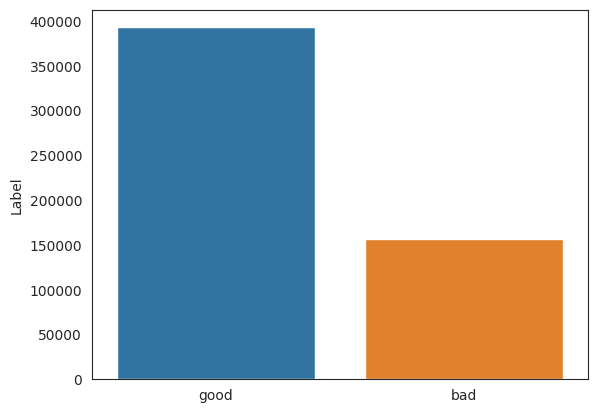

In [4]:
import pandas as pd
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix
import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from sklearn.metrics import accuracy_score
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos
from PIL import Image # getting images in notebook

# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud
from bs4 import BeautifulSoup # use for scraping the data from website
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
import pickle# use to dump model
import warnings # ignores pink warnings
warnings.filterwarnings('ignore')
#phish_data = pd.read_csv('/content/phishing_site_urls.csv') #reading the csv file
phish_data = pd.read_csv("/content/gdrive/MyDrive/phishing_site_urls.csv") #reading the csv file
phish_data.head()
phish_data.tail()
phish_data.info()
phish_data.isnull().sum() # there is no missing values
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())
#visualizing target_col for checking the number of good sites and the number of bad sites
sns.set_style('white')
sns.barplot(x=label_counts.index,y=label_counts.Label)
#tokeniser is used to split the string using regular expression
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#only alplhabets are taken
phish_data.URL[0]#trying it on one of the URL
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row


In [5]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')
phish_data.sample(5)
phish_data.sample(5)
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_tokenized'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')
phish_data.sample(5)
#CountVectorizer is a model used to transform a corpora of text to a vector of term or token counts #removing uppercase,lower case and numbers
cv = CountVectorizer()
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed
feature[:4].toarray() # convert sparse matrix into array to print transformed features

trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)
#Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X

Getting words tokenized ...
Time taken 2.715241442999968 sec
Getting joiningwords ...
Time taken 0.26277554199998576 sec


0         bad
1         bad
2         bad
3         bad
4         bad
         ... 
549341    bad
549342    bad
549343    bad
549344    bad
549345    bad
Name: Label, Length: 549346, dtype: object
0         bad
1         bad
2         bad
3         bad
4         bad
         ... 
549341    bad
549342    bad
549343    bad
549344    bad
549345    bad
Name: Label, Length: 549346, dtype: object
Logistic Regression: 

Training Accuracy : 0.979272297449813
Testing Accuracy : 0.9641465883192439

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36511
        Good       0.99      0.96      0.98    100826

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

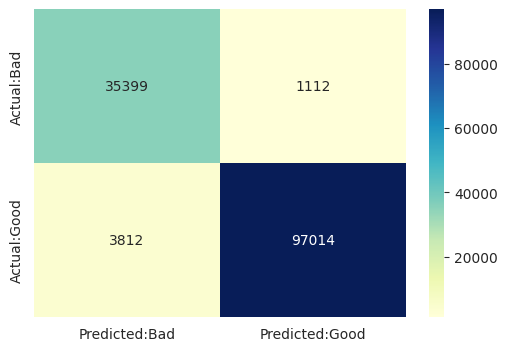

In [6]:
lr = LogisticRegression() #it is used for prediction
ser = pd.Series(phish_data.Label)#we are creating a one dimensional array
print(ser)
ser2 = ser.dropna()#it is used to drop Nan
print(ser2)
trainX, testX, trainY, testY = train_test_split(feature, ser2)#splitting
lr.fit(trainX,trainY)
lr.score(testX,testY)#accuracy score
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)
print('Logistic Regression: \n')
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
columns = ['Predicted:Bad', 'Predicted:Good'],
index = ['Actual:Bad', 'Actual:Good'])
print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
target_names =['Bad','Good']))
#confusion matrix to see the predicted and the actual results
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")


Multinomial Naive Bayesian:

Training Accuracy : 0.9763309031664983
Testing Accuracy : 0.9601256029853463

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     30783
        Good       0.97      0.97      0.97     79087

    accuracy                           0.96    109870
   macro avg       0.95      0.95      0.95    109870
weighted avg       0.96      0.96      0.96    109870


CONFUSION MATRIX


<Axes: >

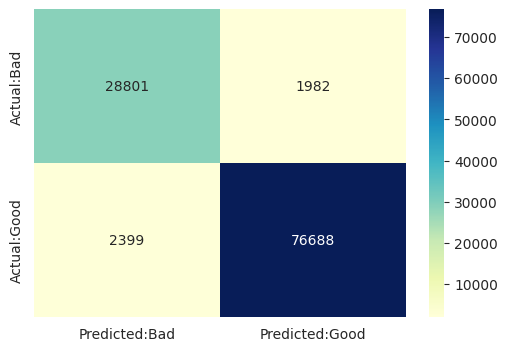

In [9]:
###Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithm based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.
mnb = MultinomialNB()
mnb.fit(trainX,trainY)
mnb.score(testX,testY)#accuracy
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)
print('Multinomial Naive Bayesian:\n')
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
columns = ['Predicted:Bad', 'Predicted:Good'],
index = ['Actual:Bad', 'Actual:Good'])
print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
target_names =['Bad','Good']))
#confusion matrix to see the predicted and the actual results
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")